# Test an home made version of curve fit (with no errors)

In [1]:
%matplotlib inline
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import matplotlib.pyplot as plt
from utils.regressor import regressor
from utils.trick_output import lin_sin_lin, trick_fit_parameters

## Simple test

Result: [1.98477399 1.20076334 0.43594286]
kmax iteration reached


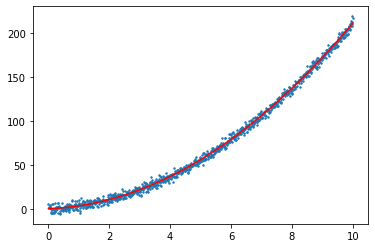

In [6]:
def para(x, a, b, c):
    """A parabola""" # <---- the model
    return a * x * x + b * x + c

def para_noisy(x, a, b, c):
    """A noisy parabola""" # <---- the data
    rng = np.random.default_rng()
    return para(x, a, b, c) + rng.normal(0, 3, len(x))

x = np.linspace(0, 10, 1000) # domain
a = 2 ; b = 1; c = 1 # pre-choosen parameters

# Put the parameters in a list
params = [a, b, c]

# Initialize target
y = para_noisy(x, *params)

# Initialize the regressor
my_reg = regressor()
my_reg.fit(x, y, para, params) # Fit the data
best_params = my_reg.best_params # get the best parameters

# Watch the results
print('Result:' , best_params)
plt.plot(x, para(x, *best_params), c = 'r')
plt.scatter(x, y, s = 2)
print(my_reg.reason)

## It will works on ours data?

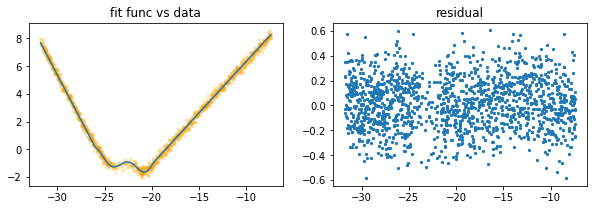

kmax iteration reached
7.961939579751052


In [9]:
raw_data=np.loadtxt(data_dir + "TR.csv",delimiter=",")[:,1:]
np.random.shuffle(raw_data)

x = np.copy(raw_data[:,11]) # easy output
y = np.copy(raw_data[:,10]) # hard output

xx = np.linspace(np.min(x), np.max(x), 1000)

# SEE FILE utils.trick_output that contain the parameters!
params = trick_fit_parameters() # Convergence guarantee

my_reg = regressor()
my_reg.fit(x, y, lin_sin_lin, params)
popt_sin = my_reg.best_params

fig, axs = plt.subplots(1, 2, figsize = (10, 3))
axs[0].plot(xx,lin_sin_lin(xx,*popt_sin))
axs[0].scatter(x, y, s = 5, label ='real', alpha = 0.2, c='orange')
axs[0].set_title('fit func vs data')
axs[1].scatter(x, y-lin_sin_lin(x,*popt_sin), s = 5)
axs[1].set_title('residual')
plt.show()
print(my_reg.reason)
print(my_reg.rmse)